1.  Buatlah 2 dataframe dari dictionary, masing- masing dictionary minimal memiliki 5 values. Dictionary pertama berisi profile customer yang memiliki variable customer id, nama customer, no seri motor dan alamat customer. Sedangkan dictionary kedua berisi informasi mengenai motor tersebut seperti no seri motor, jenis motor, harga motor dan jenis pembayaran motor. Gabungkan ( Join ) kedua dataframe tersebut dengan key join no seri motor dan beri nama data tersebut menjadi transaksi penjualan. Lalu urutkan data transaksi penjualan berdasarkan harga motor dari harga termahal ke terendah lalu save data dengan format excel atau csv.

In [ ]:
import pandas as pd

profile_customer=pd.DataFrame({"customer id" : ["001","002","003","004","005"],
                  "nama customer ": ["Dinda", "Nanda", "Silva","Silvi", "Rasya"],
                  "no seri motor": ["B 123 H", "BL 481 AL", "BK 277 LL", "B 546 AC", "BK 733 NA"],
                  "alamat customer":["Aceh","Medan", "Riau", "Padang", "Jakarta"]})
informasi_motor=pd.DataFrame({"no seri motor":["B 123 H", "BL 481 AL", "BK 277 LL", "B 546 AC", "BK 733 NA"],
                              "jenis motor": ["yamaha","honda","suzuki","honda","honda"],
                              "harga motor":[13000000, 19000000, 21000000, 17000000,16000000],
                              "jenis pembayaran motor":["cash", "kredit","kredit","cash","kredit"]})
transaksi_penjualan = profile_customer.merge(informasi_motor,how="inner", on=["no seri motor"])
transaksi_penjualan

,customer id,nama customer,no seri motor,alamat customer,jenis motor,harga motor,jenis pembayaran motor
0,001,Dinda,B 123 H,Aceh,yamaha,13000000,cash
1,002,Nanda,BL 481 AL,Medan,honda,19000000,kredit
2,003,Silva,BK 277 LL,Riau,suzuki,21000000,kredit
3,004,Silvi,B 546 AC,Padang,honda,17000000,cash
4,005,Rasya,BK 733 NA,Jakarta,honda,16000000,kredit


In [ ]:
transaksi_penjualan_motor=transaksi_penjualan.sort_values(by="harga motor", ascending=False)
transaksi_penjualan_motor

,customer id,nama customer,no seri motor,alamat customer,jenis motor,harga motor,jenis pembayaran motor
2,003,Silva,BK 277 LL,Riau,suzuki,21000000,kredit
1,002,Nanda,BL 481 AL,Medan,honda,19000000,kredit
3,004,Silvi,B 546 AC,Padang,honda,17000000,cash
4,005,Rasya,BK 733 NA,Jakarta,honda,16000000,kredit
0,001,Dinda,B 123 H,Aceh,yamaha,13000000,cash


In [ ]:
transaksi_penjualan_motor.to_csv('transaksi_penjualan_motor.csv', index=True)

2. Dengan menggunakan data Telcom Churn Prediction, lakukan overview data untuk
menentukan apakah data yang kita miliki sudah bagus atau belum. Lakukan selengkap
mungkin!
a. Cek data types dan ubah data types variable yang tidak sesuai (terutama variable
total charges)
b. Cek dan handling data duplicate, outlier ( dengan menggunakan metode apapun
silahkan explore ), missing values
c. Hitung descriptive statistics pada data tersebut

In [ ]:
df =pd.read_csv("Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


a. Cek data types dan ubah data types variable yang tidak sesuai (terutama variable total charges)

In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

b. Cek dan handling data duplicate, outlier ( dengan menggunakan metode apapun silahkan explore ), missing values

In [ ]:
#duplicate
df[df['customerID'].duplicated(keep=False)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


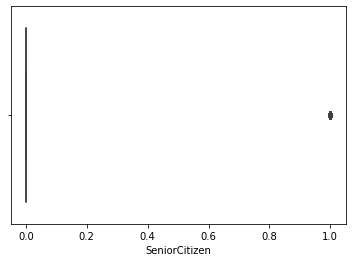

In [ ]:
#mendeteksi outlier menggunakan boxplot
sns.boxplot(df['SeniorCitizen'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


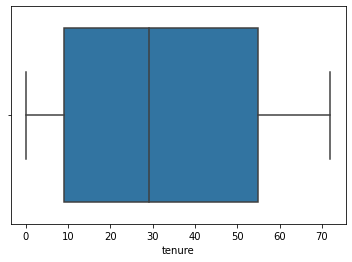

In [ ]:
sns.boxplot(df['tenure'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


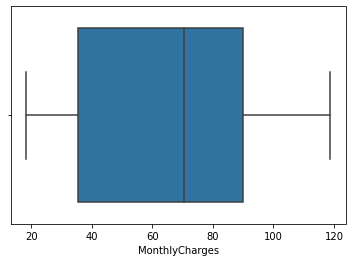

In [ ]:
sns.boxplot(df['MonthlyCharges'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


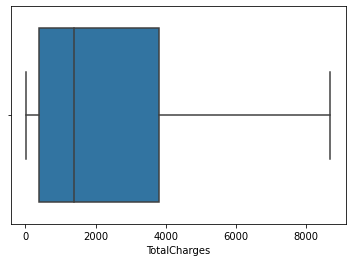

In [ ]:
sns.boxplot(df['TotalCharges'])
plt.show()

In [ ]:
#outlier di SeniorCitizen menggunakan standar deviasi
mean = df['SeniorCitizen'].mean()
std = df['SeniorCitizen'].std()
print([mean, std])

[0.1621468124378816, 0.3686116056100131]


In [ ]:
upper_limit = mean+3*std
upper_limit

1.267981629267921

In [ ]:
lower_limit = mean-3*std
lower_limit

-0.9436880043921578

In [ ]:
df[(df['SeniorCitizen'] > upper_limit) | (df['SeniorCitizen']< lower_limit)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,numberoffacility


In [ ]:
##outlier di tenure menggunakan standar deviasi
mean1 = df['tenure'].mean()
std1 = df['tenure'].std()
upper_limit1 = mean1+3*std1
lower_limit1 = mean1-3*std1
df[(df['tenure'] > upper_limit1) | (df['tenure']< lower_limit1)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,numberoffacility


In [ ]:
##outlier di MonthlyCharges menggunakan standar deviasi
mean2 = df['MonthlyCharges'].mean()
std2 = df['MonthlyCharges'].std()
upper_limit2 = mean2+3*std2
lower_limit2 = mean2-3*std2
df[(df['MonthlyCharges'] > upper_limit2) | (df['MonthlyCharges']< lower_limit2)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,numberoffacility


In [ ]:
##outlier di TotalCharges menggunakan standar deviasi
mean3 = df['TotalCharges'].mean()
std3 = df['TotalCharges'].std()
upper_limit3 = mean3+3*std3
lower_limit3 = mean3-3*std3
df[(df['TotalCharges'] > upper_limit3) | (df['TotalCharges']< lower_limit3)]

In [ ]:
#missing value
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

 c. Hitung descriptive statistics pada data tersebut

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


3. Tampilkan data dengan variable customerid, tenure, monthly charge, total charge,
churn dan index ke 0,10,100

In [ ]:
df.loc[[0,10,100],['customerID','tenure','MonthlyCharges','TotalCharges','Churn']]

,customerID,tenure,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,29.85,29.85,No
10,9763-GRSKD,13,49.95,587.45,No
100,6380-ARCEH,1,20.20,20.20,No


4. Hitung percentage orang yang churn dan tidak churn

In [ ]:
Churn1 = df['Churn']
counts = Churn1.value_counts()
percent = Churn1.value_counts(normalize=True)
percent100 = Churn1.value_counts(normalize=True).mul(100).round(1).astype(str)+'%'
pd.DataFrame ({'counts': counts,'per': percent, 'per100':percent100})

,counts,per,per100
No,5174,0.73463,73.5%
Yes,1869,0.26537,26.5%


5. Untuk menganalisis behaviour orang yang churn diperlukan untuk analisis lebih dalam
hubungan antara variable dengan target ( Churn/ Tidak Churn ).
Lihat hubungan antara variable kontrak dan variable churn. Jenis kontrak apa yang
memiliki kemungkinan churn lebih tinggi dan jenis kontrak apa yang memiliki tingkat
churn lebih rendah ( Bisa menggunaka groupby/ Pivot)

In [ ]:
pd.pivot_table(df, index=['Contract','Churn'])

MonthlyCharges  SeniorCitizen  TotalCharges     tenure
Contract       Churn                                                        
Month-to-month No          61.462635       0.164865   1521.927590  21.033333
               Yes         73.019396       0.266465   1164.460574  14.016918
One year       No          62.508148       0.123183   2903.569908  41.674063
               Yes         85.050904       0.174699   4066.212048  44.963855
Two year       No          60.012477       0.084396   3678.986103  56.602914
               Yes         86.777083       0.125000   5432.363542  61.270833

6. Membuat variable baru yang bernama numberoffacility, variable ini untuk menghitung
total fasilitas yang digunakan oleh customer. Fasilitas dihitung dari variable
OnlineSecurity, DeviceProtection, StreamingMovies, 'TechSupport', 'StreamingTV' dan
'OnlineBackup'.

Hint pengerjaan :

a. Ubah isi dari setiap variable jika ‘Yes’= 1 dan ‘No’= 0



In [ ]:
df['OnlineSecurity'] = df['OnlineSecurity'].replace(to_replace = ['Yes', 'No'], value =[1,0])
df['DeviceProtection']  = df['DeviceProtection'].replace(to_replace = ['Yes', 'No'], value =[1,0])
df['StreamingMovies']  = df['StreamingMovies'].replace(to_replace = ['Yes', 'No'], value =[1,0])
df['TechSupport']  = df['TechSupport'].replace(to_replace = ['Yes', 'No'], value =[1,0])
df['StreamingTV']  = df['StreamingTV'].replace(to_replace = ['Yes', 'No'], value =[1,0])
df['OnlineBackup']  = df['OnlineBackup'].replace(to_replace = ['Yes', 'No'], value =[1,0])


b. Buat variable baru dengan nama numberoffacility untuk menjumlahkan seluruh
variable tersebut

In [ ]:
df['numberoffacility'] = df['OnlineSecurity'] + df['DeviceProtection'] + df['StreamingMovies'] + df['TechSupport'] + df['StreamingTV'] + df['OnlineBackup']  
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,numberoffacility
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,0,...,0,0,0,Month-to-month,Yes,Electronic check,29.85,29.85,No,1
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,1,...,0,0,0,One year,No,Mailed check,56.95,1889.50,No,2
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,1,...,0,0,0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,2
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,1,...,1,0,0,One year,No,Bank transfer (automatic),42.30,1840.75,No,3
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,0,...,0,0,0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,1,...,1,1,1,One year,Yes,Mailed check,84.80,1990.50,No,5
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,0,...,0,1,1,One year,Yes,Credit card (automatic),103.20,7362.90,No,4
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,1,...,0,0,0,Month-to-month,Yes,Electronic check,29.60,346.45,No,1
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,0,...,0,0,0,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,0


7. Diasumsikan customer yang memiliki churn yang tinggi Ketika customer memiliki nilai
tenure yang pendek kurang dari 30, Monthly charge diatas 60 dan kontraknya month to
month.

a. Carilah customer dengan kondisi berikut! 

In [ ]:
ChurnRendah = df[(df['tenure']<30) & (df['MonthlyCharges']>60) & (df["Contract"] =="Month-to-month")]
ChurnRendah

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,numberoffacility
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,0,...,0,0,0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,0,...,0,1,1,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,3
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,0,...,0,1,0,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No,2
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,0,...,1,1,1,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,4
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,1,...,1,1,1,Month-to-month,Yes,Electronic check,105.50,2686.05,No,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7025,2823-LKABH,Female,0,No,No,18,Yes,Yes,Fiber optic,0,...,1,0,1,Month-to-month,Yes,Bank transfer (automatic),95.05,1679.40,No,3
7027,0550-DCXLH,Male,0,No,No,13,Yes,No,DSL,0,...,1,1,1,Month-to-month,No,Mailed check,73.35,931.55,No,4
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,0,...,0,0,0,Month-to-month,Yes,Electronic check,75.75,75.75,Yes,0
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,0,...,0,1,0,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.10,No,1


b. Berdasarkan data hasil filter tersebut carilah rata- rata Monthly charge-nya!

In [ ]:
ChurnRendah['MonthlyCharges'].agg('mean')

82.39323262839878

c. Carilah customer yang tidak memiliki kodisi di atas!

In [ ]:
df[~((df['tenure']<30) & (df['MonthlyCharges']>60) & (df["Contract"] =="Month-to-month"))]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,numberoffacility
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,0,...,0,0,0,Month-to-month,Yes,Electronic check,29.85,29.85,No,1
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,1,...,0,0,0,One year,No,Mailed check,56.95,1889.50,No,2
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,1,...,0,0,0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,2
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,1,...,1,0,0,One year,No,Bank transfer (automatic),42.30,1840.75,No,3
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,1,...,0,0,0,Month-to-month,No,Mailed check,29.75,301.90,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No,No internet serviceNo internet serviceNo inter...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,1,...,1,1,1,One year,Yes,Mailed check,84.80,1990.50,No,5
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,0,...,0,1,1,One year,Yes,Credit card (automatic),103.20,7362.90,No,4
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,1,...,0,0,0,Month-to-month,Yes,Electronic check,29.60,346.45,No,1
